In [162]:
from google.colab import drive
drive.mount('/content/drive')

# you can obtain the model from https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow1/lite
# pick the Tensorflow1 lite version model

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import os

# this is necessary for tensorflowjswizard
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# Import & Model load

In [164]:
use_model_path = '/content/drive/MyDrive/ndev-task-tracker/universal-sentence-encoder-tensorflow1-lite-v2'

In [165]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [166]:
print(tf.__version__)

2.18.0


In [167]:
embed = hub.load(use_model_path)
sp = spm.SentencePieceProcessor()
sp.load(f"{use_model_path}/assets/universal_encoder_8k_spm.model")

True

# Data Preparation

In [172]:
import os

# NOTE: dataset size are not affecting the model size (explicitly)

valid_title = [
    "project sprint 1",
    "project sprint 5",
    "project sprint 1.1",
    "project sprint 5.1",
    "taskhive dev",
    "Prime.com Dev",
    "ndev task tracker",
    "spenicle v1",
    "zenventory",
    "flownest",
    "contact app",
    "property web app",
    "pronews",
    "project sprint 5 beta",
    "project sprint 5 milestone",
    "DataSync Sprint 24 - Planning",
    "NotificationEngine v1.3 - Multi-Cloud Strategy",
    "NotificationEngine v11.3 - Deployment cost optimization"
    "NotificationEngine v2 - Mobile Push Implementation",
    "AppEngine 3 - Base",
    "AppEngine 3 - Dev",
    "AppEngine 3 - Map Integration",
    "NotificationEngine v2 - Mobile Push Implementation",
    "glassdoor app - seo improvement",
    "glassdoor - Base",
    "glassdoor app - Dev",
    "glassdoor - Map Integration",
]

meetings = [
    "project backlog refinement",
    "planning sprint",
    "technical debt sprint planning"
    "sprint retrospective session",
    "designing system architecture",
    "project discussion",
    "soda",
    "1:1 with manager",
    "attending a meeting",
    "developer catchup",
    "daily standup",
    "daily meeting",
    "internal meeting",
    "running daily standup",
    "meeting with mr colleague",
    "meet with mrs jane",
    "daily scrum meeting",
    "brainstorming session",
    "weekly sync up",
    "In-person daily meeting",
    "team meeting",
    "client meeting",
    "client call",
    "client feedback discussion",
    "client introduction",
    "lunch with client",
    "one on one with client",
    "call with client",
    "quarterly review",
    "stand-up meeting",
    "sync meeting",
    "discussion with the team",
    "meeting with stakeholders",
    "project review meeting",
    "technical discussion",
    "design review meeting",
    "planning meeting for next quarter",
    "client demo session",
    "internal team sync",
    "meeting with product manager",
    "daily huddle",
    "weekly planning session",
    "weekly progress demo",
    "progress demonstration",
    "Team - Junior Developer Mentoring",
    "Team - Tech Leadership Sync",
    "Team - Technical Interview",
    "Team - Q3 Roadmap Presentation",
    "Team - Tech Talk Organization",
    "Team Mentoring Session",
    "Emerging Tech Evaluation Workshop",
    "Technical Mentorship Program",
    "discussing roadmap",
    "discussing project roadmap",
]

# task that the result, is not known immediately by the user
background_task = [
    "Test backup and recovery systems",
    "setting up ci/cd",
    "configuring docker",
    "writing api spec",
    "deploying app",
    "app deployment",
    "refactoring code",
    "writing documentation",
    "Create and document engineering standards and guidelines",
    "resolving merge conflicts",
    "committing changes",
    "optimizing database",
    "setting up continuous integration and deployment pipelines",
    "docker container configuration",
    "api contract documentation",
    "application deployment to production",
    "codebase refactoring",
    "technical documentation creation",
    "resolving git merge conflicts",
    "pushing code to remote repository",
    "committing code changes",
    "project backlog grooming",
    "configuring build automation",
    "writing user guides",
    "resolving version control conflicts",
    "deploying a new service",
    "improving database query performance",
    "Implement preventive measures",
    "reduce app bundle size",
    "review apps bundle size",
    "writing comprehensive unit tests for a module",
    "investigating and fixing a memory leak issue",
    "investigating and fixing memory issues in frontend components",
    "writing unit tests",
    "works on error tracking implementation",
    "developing a reusable component for a new page",
    "ensure all the component are reusable",
    "ensure the component are easily sharable",
    "works on data migration scripts",
    "updating technical specifications",
    "updating design specifications",
    "addressing static analysis warnings",
    "Ensure GDPR and SOC2 compliance in new features",
    "fixing linter issues",
    "updating documentation",
]

# task that usually not have a ticket, but we do that to improve the app anyway
general_tasks = [
    "writing code",
    "fixing bugs",
    "reviewing prs",
    "managing backlog",
    "managing tickets",
    "monitor app usage tracking",
    "monitor user behaviour",
    "monitor app traffic",
    "Research emerging technologies",
    "conducting technical research",
    "Review microservices architecture design",
    "reviewing code",
    "Review and update business continuity procedures",
    "pair programming",
    "resolving bugs",
    "preparing presentation",
    "presenting updates",
    "collaborating on design",
    "writing proposal",
    "self explore",
    "self research",
    "research and found issue with memory optimization in react components",
    "bug research",
    "debugging application errors",
    "conducting code reviews",
    "help teammates's work",
    "creating slides for presentation",
    "providing project updates",
    "collaborating on system design",
    "writing a technical proposal",
    "exploring new technologies for a project",
    "researching software bugs",
    "debugging memory leak",
    "benchmarking app",
    "conducting performance benchmarking for the application",
    "investigating memory issues in frontend components",
    "investigating a memory leak issue",
    "investigate calendar component issue",
    "Analyze team velocity and plan resource allocation",
]

general_activities = [
    "afternoon prayer",
    "watching a movie",
    "playing games",
    "eating out",
    "scrolling tiktok",
    "cooking dinner",
    "taking a nap",
    "chatting with friends",
    "binge-watching netflix",
    "reading a novel",
    "doing laundry",
    "shopping online",
    "going to the mall",
    "napping",
    "watching youtube",
    "cleaning room",
    "going for a walk",
    "checking social media",
    "ordering food",
    "scrolling instagram",
    "taking a break",
    "technical training",
    "english class",
    "compliance training session",
    "web development security training",
    "training assesment",
    "prayer time in the afternoon",
    "watching a film for leisure",
    "playing video games for relaxation",
    "dining at a restaurant",
    "browsing short videos on tiktok",
    "preparing a meal for dinner",
    "taking a short rest",
    "talking with colleagues informally",
    "watching multiple episodes on netflix",
    "reading a fiction book",
    "doing the weekly laundry",
    "purchasing items online",
    "visiting a shopping mall",
    "getting some sleep",
    "watching videos on youtube for entertainment",
    "tidying up the living space",
    "going for a short walk outside",
    "checking updates on social media platforms",
    "ordering food for delivery",
    "browsing photos and videos on instagram",
    "taking a short pause from work",
    "attending a technical skill building session",
    "participating in an English language course",
    "completing mandatory compliance training",
    "attending a web security workshop",
    "undergoing a training evaluation"
]

# can be useful when no valid_title detected
# this is a task title that not representing any specific project/client
# usually task that the effect can be known by the user immediately (opposite of background task)
project_tasks = [
    "working on a new ui design",
    "create new component for new page",
    "resolve feedback: update the formatData approach",
    "resolve feedback from mr. xxx",
    "working on a new feature",
    "working on the new drawer",
    "adjust the page gdpr message",
    "handle form submit behaviour",
    "works on progressive web app features",
    "works on user interface improvements",
    "works on mobile responsive design",
    "designing a new user interface for the application",
    "addressing feedback on the data formatting logic",
    "implementing changes based on feedback from a team member",
    "building a new feature based on requirements",
    "working on the implementation of a new navigation drawer",
    "modifying the gdpr consent message displayed on the page",
    "implementing the logic for form submission and validation",
    "works on analytics dashboard",
    "Organize tech talk series and knowledge sharing initiatives",
    "Review data retention policies",
    "Cost-benefit analysis for service migration",
    "Lead incident response and post-mortem analysis",
    "Define technology roadmap for next 18 months",
    "Evaluate microservices vs monolith trade-offs",
    "Design unified architecture",
    "database performance optimization",
    "Distributed Systems Optimization",
    "App Infrastructure Optimization",
    "Edge Computing Architecture",
    "Cloud Native Transformation",
    "Platform Scalability Engineering",
    "Advanced Database Architecture",
    "Engineering Culture Evolution",
    "Future Technology Roadmap",
    "Technical Advisory Role",
    "Technical Thought Leadership",
    "Technology Patent Strategy",
    "Technical Communication Strategy",
    "Technical Excellence Program",
    "AI Integration Strategy",
    "Developer Experience Enhancement",
    "Technical Debt Strategy Summit",
    "Technology Risk Assessment",
]

dataset_dict = {
    "valid_title": valid_title,
    "background_task": background_task,
    "meetings": meetings,
    "general_tasks": general_tasks,
    "general_activities": general_activities,
    "project_tasks": project_tasks,
}

## Back-translation

english -> france -> english

warning: this section can take long time

this is not required to run, as the original dataset is quite sufficient

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# Load models for English → French and French → English
en_to_fr_tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
en_to_fr_model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-fr")

fr_to_en_tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
fr_to_en_model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-fr-en")


In [ ]:
def translate(text, tokenizer, model):
    inputs = tokenizer.encode(text, return_tensors="pt")
    outputs = model.generate(inputs, max_length=64, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

def back_translate(text):
    """
    Performs back-translation from English to French and then back to English.

    Returns:
        str: The back-translated English text.
    """
    fr_text = translate(text, en_to_fr_tokenizer, en_to_fr_model)
    back_to_en = translate(fr_text, fr_to_en_tokenizer, fr_to_en_model)
    return back_to_en

In [ ]:
background_task_bt = []
meetings_bt = []
general_tasks_bt = []
general_activities_bt = []
project_tasks_bt = []

# Back-translate sentences for each category (excluding valid_title)
for sentence in background_task:
    background_task_bt.append(back_translate(sentence))

for sentence in meetings:
    meetings_bt.append(back_translate(sentence))

for sentence in general_tasks:
    general_tasks_bt.append(back_translate(sentence))

for sentence in general_activities:
    general_activities_bt.append(back_translate(sentence))

for sentence in project_tasks:
    project_tasks_bt.append(back_translate(sentence))


print("Back-translated background_tasks:", background_task_bt[:5])
print("Back-translated meetings:", meetings_bt[:5])
print("Back-translated general_tasks:", general_tasks_bt[:5])
print("Back-translated general_activities:", general_activities_bt[:5])
print("Back-translated project_tasks:", project_tasks_bt[:5])

In [ ]:
import pickle

# Create a dictionary to store the back-translated data
back_translated_data_dict = {
    "background_task_bt": background_task_bt,
    "meetings_bt": meetings_bt,
    "general_tasks_bt": general_tasks_bt,
    "general_activities_bt": general_activities_bt,
    "project_tasks_bt": project_tasks_bt
}

# Define the filename for the pickle file
pickle_filename = "back_translated_data.pkl"

# Save the dictionary to a pickle file
with open(pickle_filename, 'wb') as f:
    pickle.dump(back_translated_data_dict, f)

print(f"Back-translated data saved to {pickle_filename}")

## Preprocessing

In [173]:
embed_fn = embed.signatures["default"]

In [174]:
# USE Lite is designed to be smaller and mobile/web-friendly, so it does not contain its own tokenizer.
# because the embed_fn signature of the Universal Sentence Encoder Lite model you loaded expects the input in this sparse format. If you tried to pass a dense tensor or just a list of token IDs directly, the model would likely throw an error.

def to_sparse(sentences):
    # Encode sentences to list of token ids
    ids = [sp.encode(s) for s in sentences]

    # Create values and indices for SparseTensor
    values = [token for sent in ids for token in sent]
    indices = [[i, j] for i, sent in enumerate(ids) for j in range(len(sent))]
    dense_shape = [len(ids), max(len(sent) for sent in ids)]

    # Convert to required tensors
    return {
        "values": tf.constant(values, dtype=tf.int64),
        "indices": tf.constant(indices, dtype=tf.int64),
        "dense_shape": tf.constant(dense_shape, dtype=tf.int64),
    }


In [175]:
# for evaluation
class_names = [
    "valid_title",
    "background_task",
    "meetings",
    "general_tasks",
    "general_activities",
    "project_tasks",
]

categories = [
    valid_title,
    background_task,
    meetings,
    general_tasks,
    general_activities,
    project_tasks
]

raw_data = [(item.lower(), label) for label, category in enumerate(categories) for item in category]

print('You have ', len(raw_data), 'data points')

You have  259 data points


In [176]:
sentences = []
labels = []

for sentence, label in raw_data:
    sentences.append(sentence.lower())
    labels.append(label)

sentences = np.array(sentences)
labels = np.array(labels)

# Display the first few elements to verify
print(f"First 5 sentences: {sentences[:5]}")
print(f"First 5 labels: {labels[:5]}")

First 5 sentences: ['project sprint 1' 'project sprint 5' 'project sprint 1.1'
 'project sprint 5.1' 'taskhive dev']
First 5 labels: [0 0 0 0 0]


In [177]:
sparse_input = to_sparse(sentences)
embeddings = embed_fn(**sparse_input)['default']

## Data splitting

In [178]:
x_train, x_test, y_train, y_test = train_test_split(
    embeddings.numpy(), labels, test_size=0.1, stratify=labels, random_state=7
)

print(len(x_train), len(x_test))

233 26


In [179]:
import collections

# Check if y_val have proper distribution
y_val_counts = collections.Counter(y_test)

# Print the counts for each class
print("Distribution of classes in y_val:")
for label, count in y_val_counts.items():
    print(f"Class {class_names[label]}: {count}")

Distribution of classes in y_val:
Class general_tasks: 4
Class project_tasks: 4
Class valid_title: 3
Class general_activities: 5
Class background_task: 5
Class meetings: 5


## prod setup

In [180]:
# combine all dataset for final result

x_train = np.concatenate((x_train, x_test), axis=0)
y_train = np.concatenate((y_train, y_test), axis=0)
len(x_train)

259

In [181]:
x_train = tf.math.l2_normalize(x_train, axis=1)

# Training

In [182]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(512,)),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation="softmax"),
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# considering a small dataset, and class imbalance
# target ~75% acc, and .8 loss (for validation data)
# and valid_title class prediction accuracy should be prioritized
# try to get 15-20% validation data if possible
history = model.fit(x_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stop])

# this reset if dataaset updated
# note (hidden layer (n) x dropout x epoch)
# 12-.3-300, 73%


Epoch 1/200
7/7 [==============================] - 1s 33ms/step - loss: 1.7910 - accuracy: 0.1256 - val_loss: 1.7789 - val_accuracy: 0.2692
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 1.7740 - accuracy: 0.1981 - val_loss: 1.7684 - val_accuracy: 0.4231
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 1.7606 - accuracy: 0.3043 - val_loss: 1.7570 - val_accuracy: 0.4615
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 1.7406 - accuracy: 0.3527 - val_loss: 1.7425 - val_accuracy: 0.4231
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 1.7184 - accuracy: 0.4396 - val_loss: 1.7230 - val_accuracy: 0.4231
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 1.7067 - accuracy: 0.4058 - val_loss: 1.7006 - val_accuracy: 0.4615
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 1.6899 - accuracy: 0.4251 - val_loss: 1.6779 - val_accuracy: 0.4615
Epoch 8/200
7/7 [======

## Evaluation

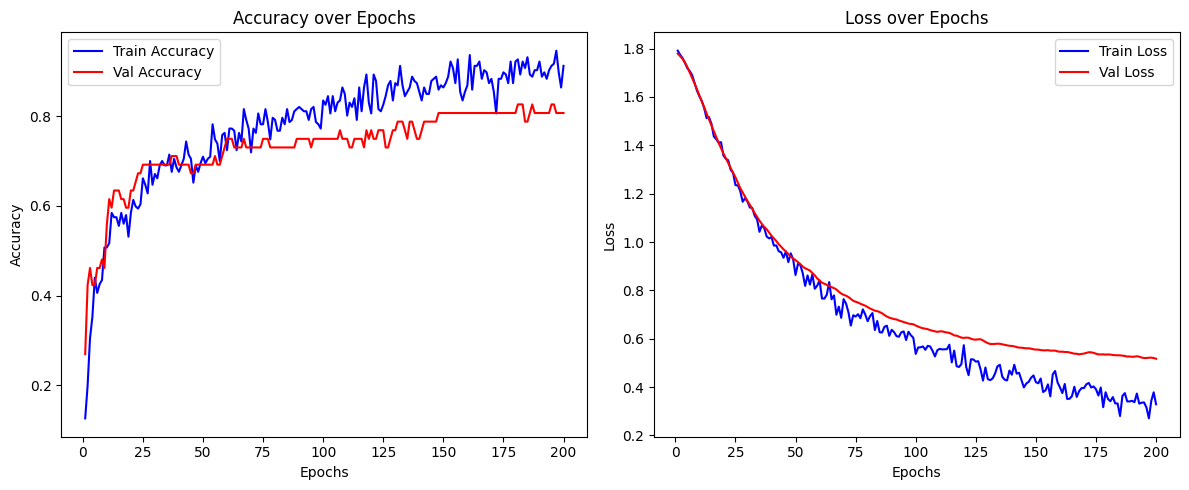

In [183]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
history_dict = history.history
acc = history_dict.get('accuracy', [])
val_acc = history_dict.get('val_accuracy', [])
loss = history_dict.get('loss', [])
val_loss = history_dict.get('val_loss', [])

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Train Accuracy')
if val_acc:
    plt.plot(epochs, val_acc, 'r-', label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Train Loss')
if val_loss:
    plt.plot(epochs, val_loss, 'r-', label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Acuracy

In [184]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Val Accuracy: {acc:.1%}")


Val Accuracy: 84.6%


1/1 [==============================] - 0s 77ms/step


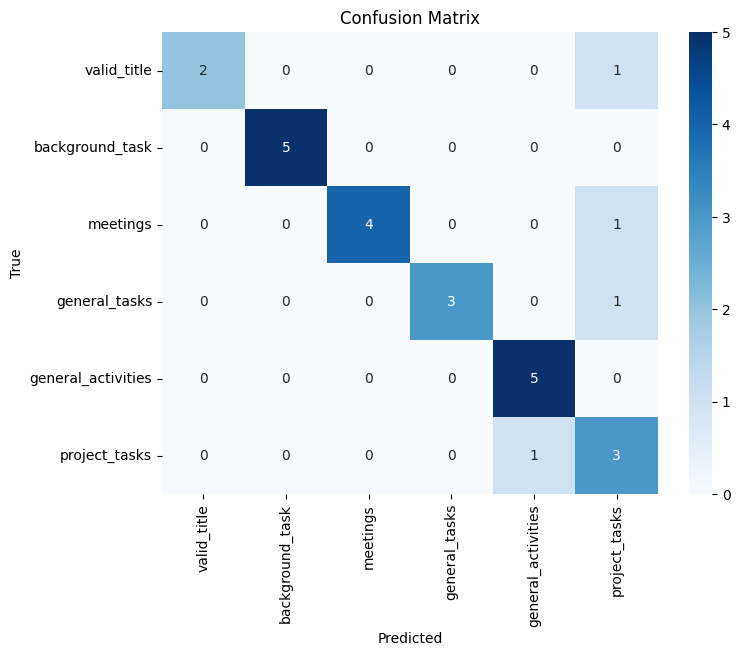

In [185]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class indices
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
# plt.legend()
plt.show()


In [186]:
# Detailed per-class performance
print(classification_report(y_test, y_pred_classes, target_names=class_names))


                    precision    recall  f1-score   support

       valid_title       1.00      0.67      0.80         3
   background_task       1.00      1.00      1.00         5
          meetings       1.00      0.80      0.89         5
     general_tasks       1.00      0.75      0.86         4
general_activities       0.83      1.00      0.91         5
     project_tasks       0.50      0.75      0.60         4

          accuracy                           0.85        26
         macro avg       0.89      0.83      0.84        26
      weighted avg       0.89      0.85      0.85        26



## see wrong result

In [189]:
new_sentences = ["my app v1", "works on container orchestration setup", "works on analytics dashboard", "eating a little pizza for a minute and wrote a code", "catchup with mr x", "Quarterly system architecture review meeting"]
new_sentences = project_tasks
# new_sentences = ['Client Call']
new_input = to_sparse(new_sentences)
new_embeddings = embed_fn(**new_input)['default']
unseen_data_predictions = model.predict(new_embeddings)
predicted_labels_unseen = unseen_data_predictions.argmax(axis=1)

# Create a dictionary to store results
results_dict = {}
for i, label in enumerate(predicted_labels_unseen):
    class_name = class_names[label]
    if class_name not in results_dict:
        results_dict[class_name] = []
    results_dict[class_name].append(new_sentences[i])

print("Predicted classes for new sentences:")
display(results_dict)

2/2 [==============================] - 0s 4ms/step
Predicted classes for new sentences:


{'project_tasks': ['working on a new ui design',
  'create new component for new page',
  'resolve feedback from mr. xxx',
  'working on a new feature',
  'adjust the page gdpr message',
  'handle form submit behaviour',
  'works on progressive web app features',
  'works on user interface improvements',
  'works on mobile responsive design',
  'designing a new user interface for the application',
  'addressing feedback on the data formatting logic',
  'implementing changes based on feedback from a team member',
  'building a new feature based on requirements',
  'working on the implementation of a new navigation drawer',
  'modifying the gdpr consent message displayed on the page',
  'implementing the logic for form submission and validation',
  'works on analytics dashboard',
  'Organize tech talk series and knowledge sharing initiatives',
  'Review data retention policies',
  'Cost-benefit analysis for service migration',
  'Lead incident response and post-mortem analysis',
  'Defin

# Save Model

In [188]:
model.save('saved_model.h5')

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
